In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Final_Data.csv')
df.head()

,CCA_date_id,Date,CCA_name,CCA,number_of_trips,avg_tip,avg_distance,avg_trip_pooled,TOT_POP,MEDINC,...,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,427,1/1/2019,Rogers Park,1,3698,0.528935,5.667036,1.339643,55062,39106.1828,...,904.099016,30.08,0.0,7.93,0.051668,0.06827,0,0,1,0.539
1,428,1/2/2019,Rogers Park,1,2467,0.513174,5.804499,1.352250,55062,39106.1828,...,904.099016,29.85,0.0,9.49,0.051668,0.06827,0,0,2,0.539
2,429,1/3/2019,Rogers Park,1,2565,0.474854,5.861442,1.384405,55062,39106.1828,...,904.099016,32.32,0.0,11.29,0.051668,0.06827,0,0,3,0.539
3,430,1/4/2019,Rogers Park,1,2941,0.481469,5.809725,1.374362,55062,39106.1828,...,904.099016,38.68,0.0,8.11,0.051668,0.06827,0,0,4,0.539
4,431,1/5/2019,Rogers Park,1,3195,0.498592,5.763944,1.348670,55062,39106.1828,...,904.099016,41.25,0.0,8.00,0.051668,0.06827,0,0,5,0.539


In [3]:
df1 = df.drop(['CCA_date_id', 'Date', 'CCA_name', 'CCA','number_of_trips', 'avg_tip',
       'avg_trip_pooled','avg_distance'], axis = 1)
df1.head()

,TOT_POP,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0.051668,0.06827,0,0,1,0.539
1,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0.051668,0.06827,0,0,2,0.539
2,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0.051668,0.06827,0,0,3,0.539
3,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0.051668,0.06827,0,0,4,0.539
4,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0.051668,0.06827,0,0,5,0.539


In [4]:
X = df1
X.head()

,TOT_POP,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,COMMperc,INSTperc,sports_day,rainy_day,weekdays,MD_AGE_POP_PCT
0,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0.051668,0.06827,0,0,1,0.539
1,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0.051668,0.06827,0,0,2,0.539
2,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0.051668,0.06827,0,0,3,0.539
3,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0.051668,0.06827,0,0,4,0.539
4,55062,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0.051668,0.06827,0,0,5,0.539


In [5]:
ridership = df.number_of_trips
tip = df.avg_tip
share_ride = df.avg_trip_pooled

In [6]:
train_X1, val_X1, train_y1, val_y1=train_test_split(X,ridership, train_size=0.8)

In [7]:
clf = RandomForestRegressor()
clf.fit(train_X1, train_y1)
y_preds1 = clf.predict(val_X1)
acc_rf = round(clf.score(val_X1, val_y1), 4)
print ('Ridership Prediction R Squared is '+str(acc_rf))

Ridership Prediction R Squared is 0.9786


In [18]:
importances=clf.feature_importances_

Feature ranking:
1. feature 14 (0.772393)
2. feature 2 (0.108752)
3. feature 13 (0.043603)
4. feature 5 (0.020633)
5. feature 0 (0.016416)
6. feature 6 (0.011535)
7. feature 8 (0.007851)
8. feature 10 (0.006633)
9. feature 1 (0.004183)
10. feature 7 (0.002924)
11. feature 4 (0.002846)
12. feature 9 (0.001055)
13. feature 12 (0.000500)
14. feature 3 (0.000375)
15. feature 11 (0.000299)


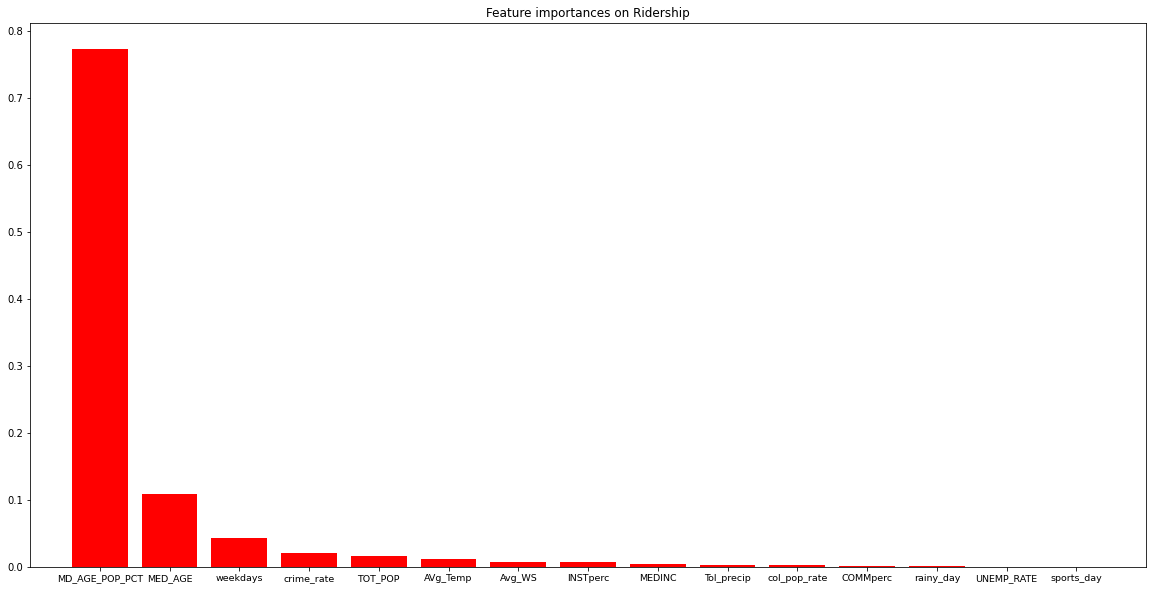

In [19]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Ridership")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]),X.columns[indices],fontsize=9.5)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0.5, 1.0, 'Predicted Ridership vs Real Ridership(test data)')

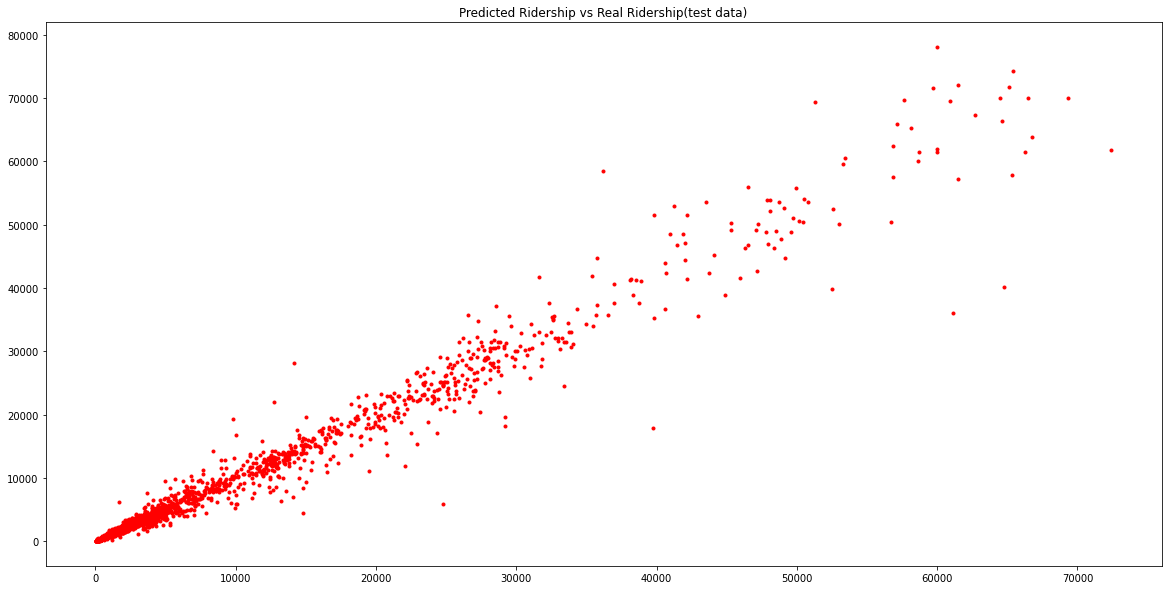

In [20]:
plt.plot(y_preds1,val_y1,'r.')
plt.title("Predicted Ridership vs Real Ridership(test data)")


In [21]:
import statsmodels.api as sm
model = sm.OLS(val_y1,y_preds1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        number_of_trips   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.230e+05
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:57:35   Log-Likelihood:                         -56075.
No. Observations:                6561   AIC:                                  1.122e+05
Df Residuals:                    6560   BIC:                                  1.122e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
X1=df1.drop(['TOT_POP','COMMperc','INSTperc','MD_AGE_POP_PCT'], axis = 1)
X1.head()

,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,sports_day,rainy_day,weekdays
0,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0,0,1
1,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0,0,2
2,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0,0,3
3,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0,0,4
4,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0,0,5


In [23]:
train_X2, val_X2, train_y2, val_y2=train_test_split(X1,tip,train_size=0.8)

In [24]:
clf = RandomForestRegressor()
clf.fit(train_X2, train_y2)
y_preds2 = clf.predict(val_X2)
acc_rf = round(clf.score(val_X2, val_y2), 4)
print ('Tip Prediction R Squared is '+str(acc_rf))

Tip Prediction R Squared is 0.9207


In [25]:
importances=clf.feature_importances_

Feature ranking:
1. feature 2 (0.350176)
2. feature 4 (0.202947)
3. feature 0 (0.157489)
4. feature 3 (0.132564)
5. feature 1 (0.083908)
6. feature 5 (0.030497)
7. feature 7 (0.018982)
8. feature 10 (0.013295)
9. feature 6 (0.007280)
10. feature 8 (0.002031)
11. feature 9 (0.000832)


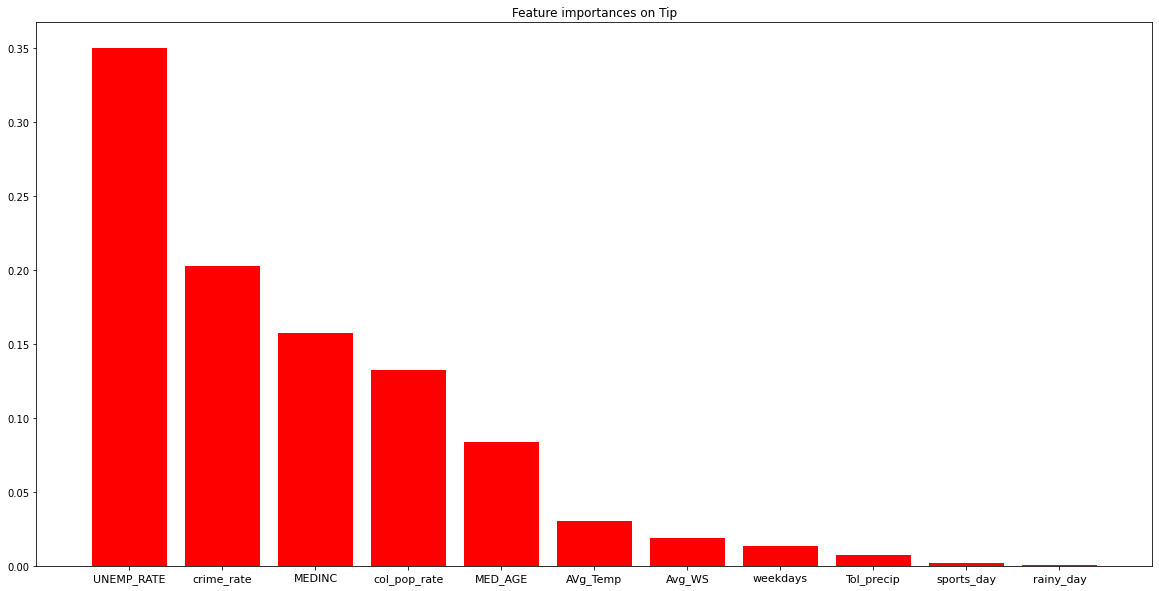

In [26]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Tip")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]),X1.columns[indices],fontsize=11)
plt.xlim([-1, X1.shape[1]])
plt.show()

Text(0.5, 1.0, 'Predicted Tip vs Real Tip(test data)')

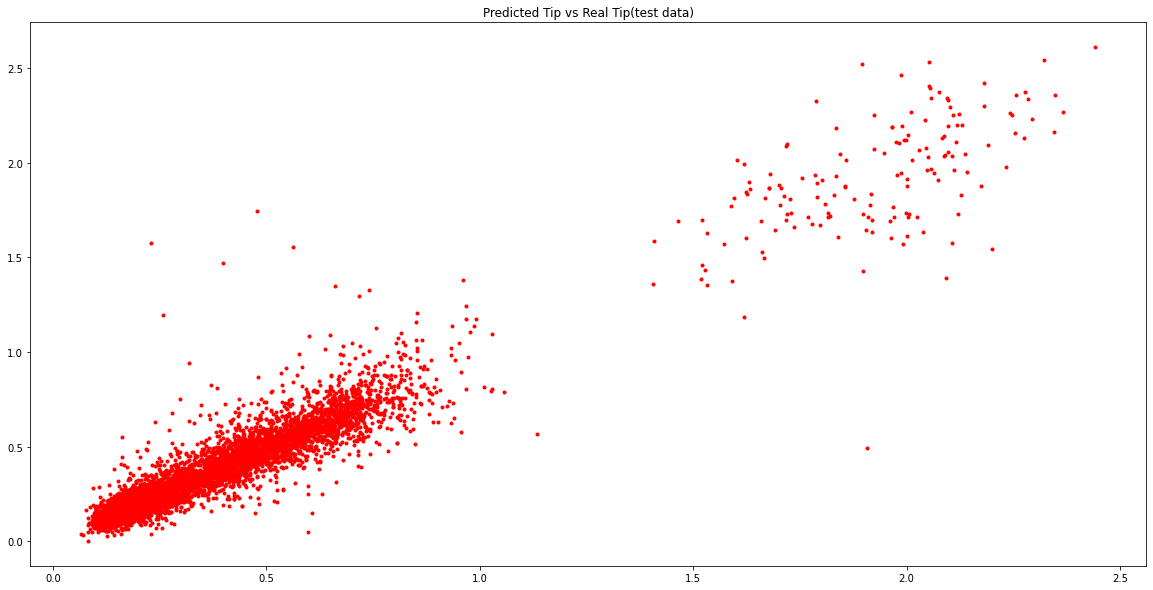

In [27]:
plt.plot(y_preds2,val_y2,'r.')
plt.title("Predicted Tip vs Real Tip(test data)")

In [28]:
model = sm.OLS(val_y2,y_preds2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                avg_tip   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          2.033e+05
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:57:47   Log-Likelihood:                          6532.0
No. Observations:                6561   AIC:                                 -1.306e+04
Df Residuals:                    6560   BIC:                                 -1.306e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
X2=X1
X2.head()

,MEDINC,MED_AGE,UNEMP_RATE,col_pop_rate,crime_rate,AVg_Temp,Tol_precip,Avg_WS,sports_day,rainy_day,weekdays
0,39106.1828,33.972649,0.0451,0.7654,904.099016,30.08,0.0,7.93,0,0,1
1,39106.1828,33.972649,0.0451,0.7654,904.099016,29.85,0.0,9.49,0,0,2
2,39106.1828,33.972649,0.0451,0.7654,904.099016,32.32,0.0,11.29,0,0,3
3,39106.1828,33.972649,0.0451,0.7654,904.099016,38.68,0.0,8.11,0,0,4
4,39106.1828,33.972649,0.0451,0.7654,904.099016,41.25,0.0,8.00,0,0,5


In [30]:
train_X3, val_X3, train_y3, val_y3=train_test_split(X2,share_ride,train_size=0.8)

In [31]:
clf = RandomForestRegressor()
clf.fit(train_X3, train_y3)
y_preds2 = clf.predict(val_X3)
acc_rf = round(clf.score(val_X3, val_y3), 4)
print ('Pooled Trip Prediction R Squared is '+str(acc_rf))

Pooled Trip Prediction R Squared is 0.8829


In [32]:
importances=clf.feature_importances_

Feature ranking:
1. feature 0 (0.293084)
2. feature 5 (0.264430)
3. feature 7 (0.142628)
4. feature 2 (0.083760)
5. feature 10 (0.060180)
6. feature 6 (0.050092)
7. feature 1 (0.041732)
8. feature 4 (0.038779)
9. feature 3 (0.021757)
10. feature 9 (0.003308)
11. feature 8 (0.000252)


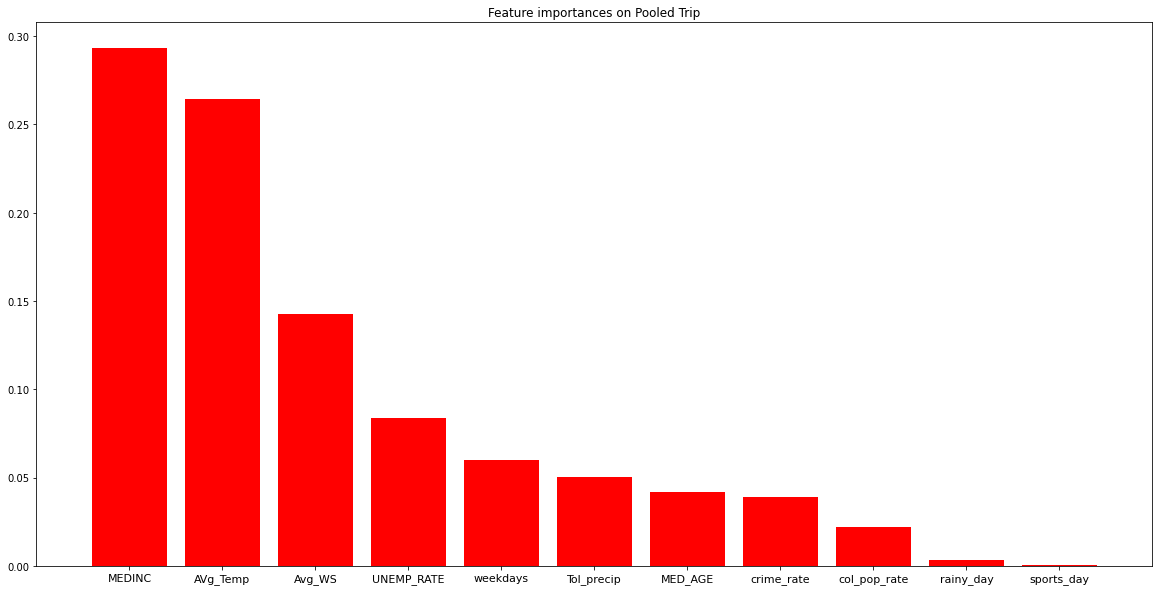

In [33]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.rcParams["figure.figsize"] = [20, 10]
plt.figure()
plt.title("Feature importances on Pooled Trip")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]),X2.columns[indices],fontsize=11)
plt.xlim([-1, X2.shape[1]])
plt.show()